In [101]:
# @title
# entorno

# librerías
""" # Atención a dependencias, si fuese necesario instalarlas

   pip install pandas numpy matplotlib
"""
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

# variables

In [102]:
# @title
#########################################################################
#   Montar almacenamiento y acceder a datasets.-                        #
#########################################################################
%%capture
# Montar Google Drive
drive.mount('/content/drive')

# Cargar el archivo CSV desde la subcarpeta dataset
df = pd.read_csv('/content/drive/MyDrive/Análisis de la Relación entre Suicidio Masculino Adulto y Factores Económicos en Uruguay/datasets/pbi-uy-Data.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Análisis de la Relación entre Suicidio Masculino Adulto y Factores Económicos en Uruguay/datasets/estadisticas_vitales_msp_suicidio_2004_2024_sexo_grupos_etarios_quinquenales.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Análisis de la Relación entre Suicidio Masculino Adulto y Factores Económicos en Uruguay/datasets/ipc-1990-2025-base-diciembre-2010-100.csv')


In [103]:
# @title
# Leer con pandas, primera fila como header
def cargar_csv_pbi_uy(ruta_archivo="/content/drive/MyDrive/Análisis de la Relación entre Suicidio Masculino Adulto y Factores Económicos en Uruguay/datasets/pbi-uy-Data.csv"):
  df = pd.read_csv(ruta_archivo)
  # Obtener las etiquetas (nombres de las columnas)
  columnas = df.columns.tolist()
  etiqueta_años = columnas[0] if len(columnas) > 0 else "Años"
  etiqueta_valores = columnas[1] if len(columnas) > 1 else "Valores"

  # Split the combined column into two columns
  df[['años', 'valores']] = df[etiqueta_años].str.split(';', expand=True)

  # Convert to appropriate data types
  años = df['años'].dropna().astype(int).tolist()
  valores = df['valores'].dropna().astype(float).tolist()


  return años, valores, etiqueta_años, etiqueta_valores, df

años, valores, etiqueta_años, etiqueta_valores, df = cargar_csv_pbi_uy()

# print(df.head(10))  # Primeras 10 filas

In [104]:
# @title
# Leer con pandas, primera fila como header
def cargar_csv_etarios_quinquenales(ruta_archivo_1="/content/drive/MyDrive/Análisis de la Relación entre Suicidio Masculino Adulto y Factores Económicos en Uruguay/datasets/estadisticas_vitales_msp_suicidio_2004_2024_sexo_grupos_etarios_quinquenales.csv"):
  df1 = pd.read_csv(ruta_archivo_1)
  # Obtener las etiquetas (nombres de las columnas)
  columnas = df1.columns.tolist()
  etiqueta_año = columnas[0] if len(columnas) > 0 else "Año"
  etiqueta_sexo = columnas[1] if len(columnas) > 1 else "Sexo"
  etiqueta_0509 = columnas[2] if len(columnas) > 2 else "05-09"
  etiqueta_1014 = columnas[3] if len(columnas) > 3 else "10-14"
  etiqueta_1519 = columnas[4] if len(columnas) > 4 else "15-19"
  etiqueta_2024 = columnas[5] if len(columnas) > 5 else "20-24"
  etiqueta_2529 = columnas[6] if len(columnas) > 6 else "25-29"
  etiqueta_3034 = columnas[7] if len(columnas) > 7 else "30-34"
  etiqueta_3539 = columnas[8] if len(columnas) > 8 else "35-39"
  etiqueta_4044 = columnas[9] if len(columnas) > 9 else "40-44"
  etiqueta_4549 = columnas[10] if len(columnas) > 10 else "45-49"
  etiqueta_5054 = columnas[11] if len(columnas) > 11 else "50-54"
  etiqueta_5559 = columnas[12] if len(columnas) > 12 else "55-59"
  etiqueta_6064 = columnas[13] if len(columnas) > 13 else "60-64"
  etiqueta_6569 = columnas[14] if len(columnas) > 14 else "65-69"
  etiqueta_7074 = columnas[15] if len(columnas) > 15 else "70-74"
  etiqueta_7579 = columnas[16] if len(columnas) > 16 else "75-79"
  etiqueta_8084 = columnas[17] if len(columnas) > 17 else "80-84"
  etiqueta_8589 = columnas[18] if len(columnas) > 18 else "85-89"
  etiqueta_9094 = columnas[19] if len(columnas) > 19 else "90-94"
  etiqueta_95mas = columnas[20] if len(columnas) > 20 else "95-mas"

  # Parámetros etarios OPS

#  - 00 - 05 años // primer infancia
#  - 06 - 11 años // infancia
#  - 12 - 18 años // adolescencia
#  - 14 - 26 años // juventud
#  - 27 - 59 años // adultez
#  - 60 o +  años // adulto mayor

  return etiqueta_año, etiqueta_sexo, etiqueta_0509, etiqueta_1014, etiqueta_1519, etiqueta_2024, etiqueta_2529, etiqueta_3034, etiqueta_3539, etiqueta_4044, etiqueta_4549, etiqueta_5054, etiqueta_5559, etiqueta_6064, etiqueta_6569, etiqueta_7074, etiqueta_7579, etiqueta_8084, etiqueta_8589, etiqueta_9094, etiqueta_95mas, df1

etiqueta_año, etiqueta_sexo, etiqueta_0509, etiqueta_1014, etiqueta_1519, etiqueta_2024, etiqueta_2529, etiqueta_3034, etiqueta_3539, etiqueta_4044, etiqueta_4549, etiqueta_5054, etiqueta_5559, etiqueta_6064, etiqueta_6569, etiqueta_7074, etiqueta_7579, etiqueta_8084, etiqueta_8589, etiqueta_9094, etiqueta_95mas, df1 = cargar_csv_etarios_quinquenales()

# print(df1.head(10))  # Primeras 10 filas

In [105]:
# @title
# Leer con pandas, primera fila como header
def cargar_csv_ipc_uy(ruta_archivo="/content/drive/MyDrive/Análisis de la Relación entre Suicidio Masculino Adulto y Factores Económicos en Uruguay/datasets/ipc-1990-2025-base-diciembre-2010-100.csv"):
  df2 = pd.read_csv(ruta_archivo)
  # Obtener las etiquetas (nombres de las columnas)
  columnas2 = df2.columns.tolist()
  etiqueta_años2 = columnas2[0] if len(columnas2) > 0 else "Año"
  etiqueta_valores2 = columnas2[1] if len(columnas2) > 1 else "Serie IPC anual"

  # The CSV seems to have columns 'Año', 'Serie IPC anual', 'Tasa de Variación 12 meses (%)'
  # We don't need to split based on the variable inspector output.
  # Let's use the existing columns directly.

  # Convert 'Año' to integer
  año = df2[etiqueta_años2].dropna().astype(int).tolist()

  # Convert 'Serie IPC anual' to float, handling commas as decimal separators
  valores = df2[etiqueta_valores2].str.replace(',', '.', regex=False).dropna().astype(float).tolist()


  return año, valores, etiqueta_años2, etiqueta_valores2, df2

año, valores_ipc, etiqueta_años2, etiqueta_valores2, df2 = cargar_csv_ipc_uy()

# print(df2.head(10))  # Primeras 10 filas

Autor: Alejandro Gabriel Ferrari Espiga

Afiliación: afdata.uy

Derechos: CC BY-NC-ND 4.0 [https://creativecommons.org/licenses/by-nc-nd/4.0/](https://creativecommons.org/licenses/by-nc-nd/4.0/)

---

# Resumen ejecutivo:
Este análisis exploratorio de datos investiga la posible relación entre los factores económicos de Uruguay y el índice de suicidios en hombres adultos (de 27 a 59 años) en el período 2004-2024.

Los hallazgos más significativos demuestran que, a medida que el Producto Bruto Interno (PBI) disminuye y el Índice de Precios al Consumo (IPC) aumenta, el número de suicidios en este grupo demográfico se incrementa anualmente. Si bien este análisis no puede establecer una causalidad directa, sí proporciona una evidencia inicial sólida de una asociación entre estas variables.

Para este estudio, se utilizaron datos públicos de las Estadísticas Vitales del Ministerio de Salud Pública y del Banco Central del Uruguay, lo que facilitó el acceso a la información. Los resultados sugieren la necesidad de realizar investigaciones más profundas para comprender mejor esta compleja relación y poder desarrollar políticas públicas efectivas para la prevención del suicidio.

**Keywords**: suicidio, adultez, masculinidad, economía, IPC, PBI, Uruguay, políticas públicas, salud mental, prevención, factores psicosociales, factores socioeconómicos.

\newpage
# El Suicidio en Uruguay: Un Panorama Estadístico General (2024)
Para comprender el contexto del suicidio en la población masculina que vive su adultez, es fundamental examinar el panorama general de esta problemática en Uruguay durante 2024. Según los datos oficiales del Ministerio de Salud Pública (MSP), un total de 764 personas se quitaron la vida a lo largo del año. Esto se traduce en una tasa de suicidio de 21.35 por cada 100,000 habitantes, lo que representa una ligera disminución en comparación con el pico registrado en 2022 (23.2), aunque la tendencia general desde el año 2000 continúa en ascenso.(1)
El análisis demográfico proporcionado por el MSP se basa en categorías correspondientes a grupos etarios quinquenales, subdivididos en categorías binarias por sexo, lo que ofrece un punto de partida para este informe.

**Demográfico (Clasificación del MSP)**

*   **Por sexo**: El informe revela una brecha de género persistente. El 76% de las muertes por suicidio en 2024 correspondió a hombres y el 24% a mujeres. Las tasas por sexo fueron de 33.3 en hombres y 10.1 en mujeres, una proporción que se ha mantenido consistente a lo largo del tiempo. Concretamente, el 51.70% del total de suicidios se corresponde con los consumados por adultos masculinos de entre 25 y 59 años.(1)(2)
*   **Por edad**: Los grupos etarios con las tasas más elevadas fueron las personas mayores de 80 años o más. El grupo de 85 a 89 años presentó una tasa de 38.2 por 100,000 habitantes, seguido por los mayores de 90 años con una tasa de 37.6. Adicionalmente, el grupo de 20 a 24 años registró una tasa de 33.2, una cifra particularmente alarmante por ser la más alta históricamente para esta franja etaria.(1)

| Indicador Demográfico | Cifras del MSP, 2024 |  |
| :---- | :---- | ----- |
| Número Total de Suicidios | 764 |  |
| Tasa Nacional | 21.35 por 100,000 hab. |  |
| Distribución por Sexo | Hombres: 76% / Mujeres: 24% |  |
| Tasa de Suicidio en Hombres | 33.3 por 100,000 hab. |  |
| Tasa de Suicidio en Mujeres | 10.1 por 100,000 hab. |  ||
| Tasa en el Grupo de 20 a 24 años | 33.2 por 100,000 hab. |  |
| Tasas en Mayores de 85 años | 38.2 (85-89 años) y 37.6 (\>90 años) |  |
| **Adultos masculinos entre 19 y 59 años** | 395 casos - **51.70% del total de casos** |  |
| Fuente: MSP, 2024  |(1)(2)  |  |

\newpage
# Acceso a Datos Específicos: Un Beneficio Metodológico
Uruguay, desde hace ya varios años, se encuentra comprometido con la transparencia en el acceso a la información pública. En ese aspecto, debido a que tanto el Ministerio de Salud Pública, como el Banco Central del Uruguay, cumplen de forma correcta con esto, dicho compromiso se convirtió en un beneficio al momento de acceder a la información necesaria para llevar adelante la adquisición de datos para el análisis. Estos datos, se encontraban disponibles para su descarga en archivos de formatos accesibles con herramientas de software libre y o código abierto lo que los vuelve técnicamente accesibles.(2)(3)(4)

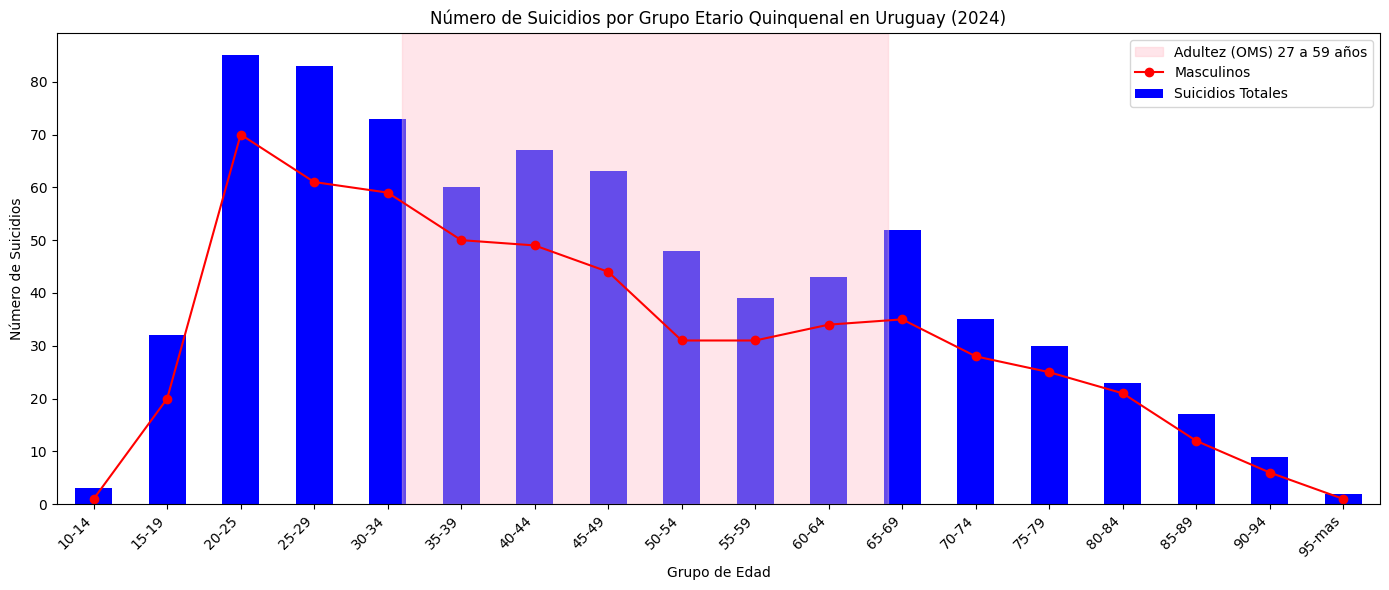

In [106]:
# @title
# Filter data for the year 2024
df1_2024 = df1[df1[etiqueta_año] == 2024].copy()

# Define the age group columns
age_groups = [etiqueta_1014, etiqueta_1519, etiqueta_2024,
              etiqueta_2529, etiqueta_3034, etiqueta_3539, etiqueta_4044,
              etiqueta_4549, etiqueta_5054, etiqueta_5559, etiqueta_6064,
              etiqueta_6569, etiqueta_7074, etiqueta_7579, etiqueta_8084,
              etiqueta_8589, etiqueta_9094, etiqueta_95mas]

# Calculate the total suicides for each age group (sum of male and female)
suicide_counts_2024 = df1_2024[age_groups].sum(axis=0)

# Filter for male suicides in 2024
df1_2024_male = df1_2024[df1_2024[etiqueta_sexo] == 'Masculino'].copy()
male_suicide_counts_2024 = df1_2024_male[age_groups].iloc[0]


# Create a vertical bar plot
plt.figure(figsize=(14, 6))
ax = suicide_counts_2024.plot(kind='bar', color='blue', label='Suicidios Totales')
ax.axvspan(4.20, 10.80, color='pink', alpha=0.4, label='Adultez (OMS) 27 a 59 años')

# Add the line plot for male suicides
male_suicide_counts_2024.plot(kind='line', color='red', marker='o', ax=ax, label='Masculinos')




plt.xlabel("Grupo de Edad")
plt.ylabel("Número de Suicidios")
plt.title("Número de Suicidios por Grupo Etario Quinquenal en Uruguay (2024)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Visualización #1** _mostrando el total de suicidios (masculino+femenino) por grupo etario quinquenal desde el grupo 05-09 años a 95-o más años. La curva roja muestra de forma diferenciada unicamente los casos correspondientes a sujetos masculinos. El área rozada encierra al periodo comprendido en la adultez. Desarrollo propio. Fuente (2)._

\newpage
# La distribución por edades: no es una excepción del año 2024
Resulta inevitable frente a lo observado en el año 2024 el plantearse la duda respecto a si esta distribución de casos de suicidio por grupo etario quinquenal fue una ocurrencia excepcional de este año en cuestión, o esto es un contexto recurrente.
A partir de esta duda es que recurriendo a la información disponible en los registros de Estadísticas Vitales del Ministerio de Salud Pública se decide considerar una ventana temporal de 21 años y volcar la información del periodo 2004 al 2024 en una visualización superponiendo las 21 curvas.(2)
Se observa que las curvas superpuestas describen un patrón geométrico similar al del año 2024.

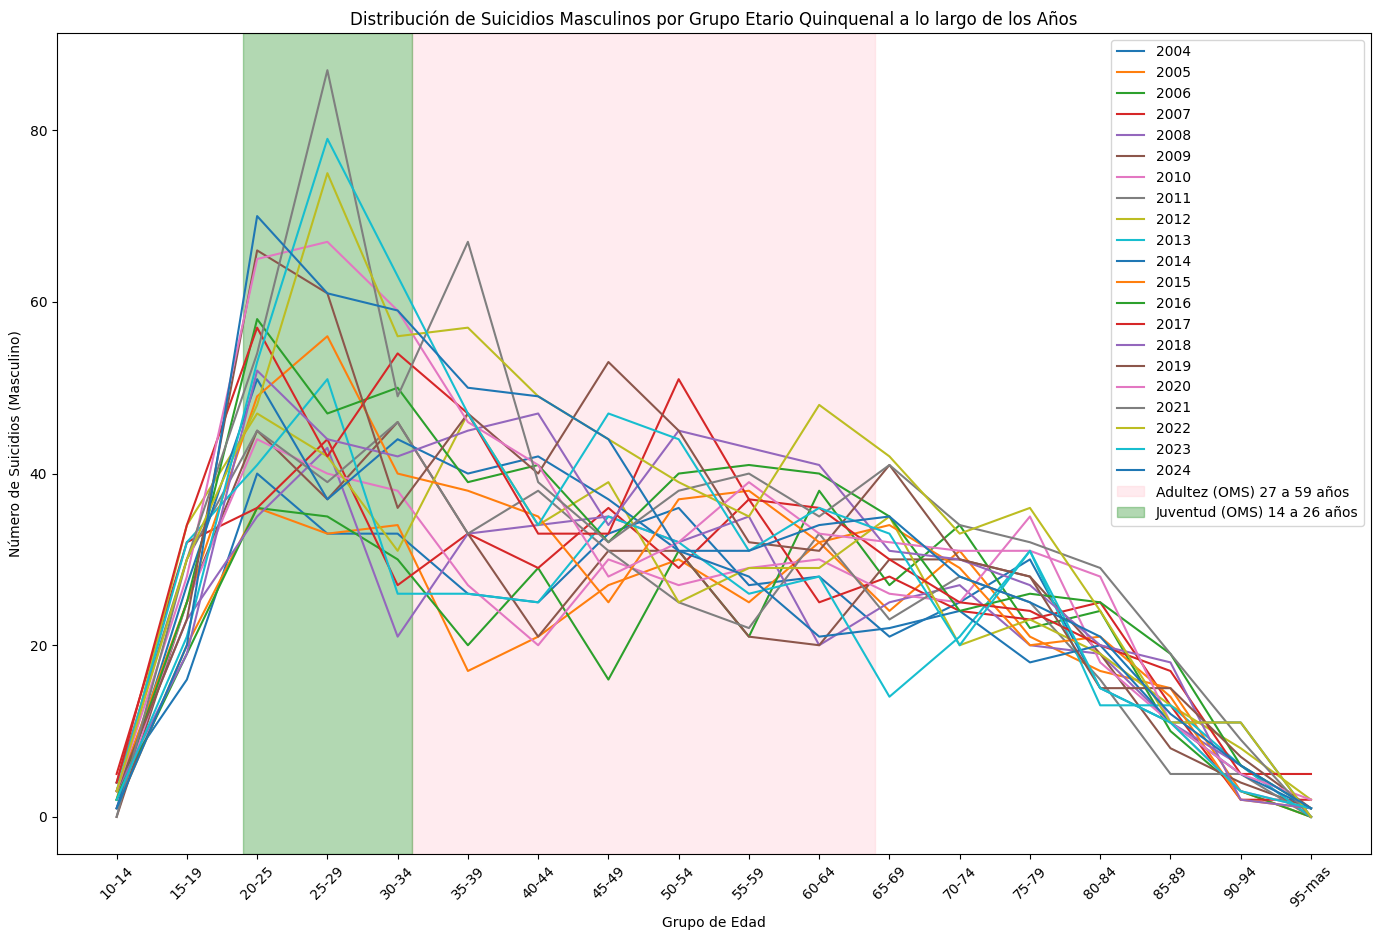

In [107]:
# @title
# Filter for male suicides
df1_male = df1[df1[etiqueta_sexo] == 'Masculino'].copy()

# Define the age group columns
age_groups = [etiqueta_1014, etiqueta_1519, etiqueta_2024,
              etiqueta_2529, etiqueta_3034, etiqueta_3539, etiqueta_4044,
              etiqueta_4549, etiqueta_5054, etiqueta_5559, etiqueta_6064,
              etiqueta_6569, etiqueta_7074, etiqueta_7579, etiqueta_8084,
              etiqueta_8589, etiqueta_9094, etiqueta_95mas]

# Get the unique years
years = df1_male[etiqueta_año].unique()

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(15, 9.5))

# Iterate through each year and plot the distribution
for year in years:
    df_year = df1_male[df1_male[etiqueta_año] == year]

    # Extract the suicide counts for the age groups
    suicide_counts = df_year[age_groups].iloc[0].tolist()

    # Create a line plot on the subplot, labeling each line with the year
    ax.plot(age_groups, suicide_counts, label=year)

ax.set_xlabel("Grupo de Edad")
ax.set_ylabel("Número de Suicidios (Masculino)")
ax.set_title("Distribución de Suicidios Masculinos por Grupo Etario Quinquenal a lo largo de los Años")
ax.tick_params(axis='x', rotation=45)

# Add a legend
ax.legend(title="Año", loc='upper right', bbox_to_anchor=(1.1, 1.0))

plt.tight_layout()

ax.axvspan(4.20, 10.80, color='pink', alpha=0.3, label='Adultez (OMS) 27 a 59 años')
ax.axvspan(1.80, 4.20, color='green', alpha=0.3, label='Juventud (OMS) 14 a 26 años')
plt.legend()

plt.show()

**Visualización #2** _mostrando el total de suicidios en los años comprendidos desde el 2004 al 2024 (masculino+femenino) por grupo etario quinquenal desde el grupo 05-09 años a 95-o más años. En rozado se delimita el periodo de la adultez (27 a 59 años) y en verde se delimita el periodo de la juventud (14 a 26 años). Desarrollo propio. Fuente (2)._

\newpage
# El suicidio masculino en las últimas dos décadas y la economía de Uruguay
Posterior a la crisis económica del año 2002 en Uruguay se experimentó un efecto "rebote" conocido como "Viento de cola" en el que la economía evolucionó proyectando una sensación de "prosperidad" y "seguridad" sobre la población.
Sin embargo, este llegó a su fin entre los años 2012 y 2013, momento en el que Uruguay entraría en un periodo de "estancamiento económico" sobre el que a su vez incidió la pandemia de COVID-19 desde el año 2020 al 2022 con sus consecuencias. Es común la opinión de que este estancamiento aún no se revierte.
Durante este periodo, los casos de suicidios en sujetos masculinos en adultez han mantenido una tendencia al incremento con pequeñas fluctuaciones de baja incidencia.(2) Se considera de interés el enfrentar la evolución del número de suicidios de sujetos masculinos en la adultez con la evolución de los indicadores económicos durante el periodo de estancamiento económico. El mótivo que nos lleva a esto es el que pese a los avances en la normativa y cultura de genero del Uruguay, el hombre continúa siendo visto como la figura responsable ante la familia y la sociedad.(5)(6)(7)(8)

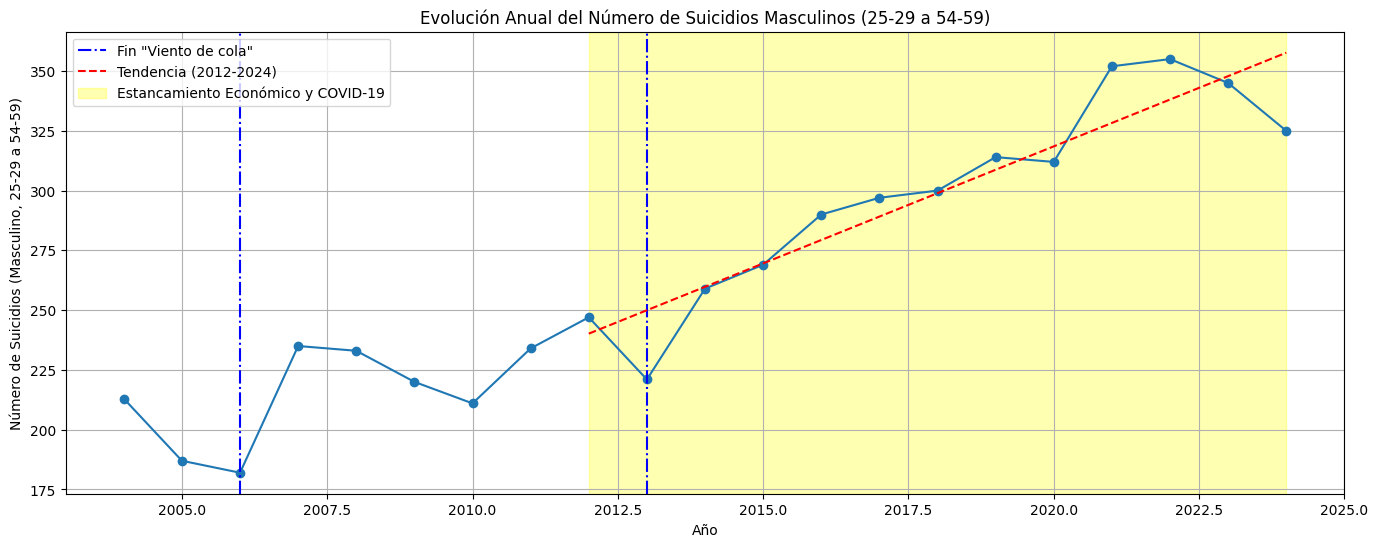

In [108]:
# @title
# Filter for male suicides
df1_male = df1[df1[etiqueta_sexo] == 'Masculino'].copy()

# Define the relevant age group columns
relevant_age_groups = [etiqueta_2529, etiqueta_3034, etiqueta_3539, etiqueta_4044,
                       etiqueta_4549, etiqueta_5054, etiqueta_5559]

# Select only the year and relevant age group columns
df_male_relevant_ages = df1_male[[etiqueta_año] + relevant_age_groups].copy()

# Convert relevant age group columns to numeric, coercing errors
for col in relevant_age_groups:
    df_male_relevant_ages[col] = pd.to_numeric(df_male_relevant_ages[col], errors='coerce')

# Calculate the sum of suicides for the relevant age groups per year
df_male_relevant_ages['total_suicides_relevant_ages'] = df_male_relevant_ages[relevant_age_groups].sum(axis=1)


plt.figure(figsize=(16.5, 6))
plt.plot(df_male_relevant_ages[etiqueta_año], df_male_relevant_ages['total_suicides_relevant_ages'], marker='o')
plt.xlabel("Año")
plt.ylabel("Número de Suicidios (Masculino, 25-29 a 54-59)")
plt.title("Evolución Anual del Número de Suicidios Masculinos (25-29 a 54-59)")
plt.grid(True)

plt.axvline(x=2006, color='blue', linestyle='dashdot')
plt.axvline(x=2013, color='blue', linestyle='dashdot', label='Fin "Viento de cola"')

# tendencia 2012-2024
df_trend = df_male_relevant_ages[(df_male_relevant_ages[etiqueta_año] >= 2012) & (df_male_relevant_ages[etiqueta_año] <= 2024)].copy()
x = df_trend[etiqueta_año]
y = df_trend['total_suicides_relevant_ages']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red', linestyle='--', label='Tendencia (2012-2024)')
plt.axvspan(2012, 2024, color='yellow', alpha=0.3, label='Estancamiento Económico y COVID-19')
plt.legend()

plt.show()

**Visualización #3** _mostrando la evolución de los suicidios de los sujetos masculinos de entre 25 a 59 años durante la ventana temporal que se abre desde el año 2004 al 2024. En amarillo, estancamiento económico + COVID-19. En rojo, línea de tendencia del número de suicidios. Desarrollo propio. Fuente (1)(2)(3)(4)(8)._

\newpage
# Factores psicosociales y su relación con los indicadores económicos
Los factores psicosociales tienen una relación compleja y bidireccional con los indicadores económicos. Aquí algunos ejemplos organizados por categorías:

## Confianza y Expectativas

La confianza del consumidor es uno de los predictores más fuertes del PIB, ya que las expectativas optimistas impulsan el gasto y la inversión. Las expectativas inflacionarias pueden generar profecías autocumplidas: si los consumidores esperan inflación, aumentan sus compras anticipadamente, presionando los precios al alza. La confianza en las instituciones también afecta la estabilidad de los mercados financieros y la disposición a invertir a largo plazo.

## Percepción de Riesgo y Aversión a la Incertidumbre

Durante crisis o períodos de incertidumbre política, los consumidores tienden a aumentar el ahorro precautorio, reduciendo el consumo y afectando negativamente el PIB. La percepción de seguridad laboral influye directamente en las decisiones de gasto de los hogares, mientras que la aversión al riesgo colectiva puede generar corridas bancarias o burbujas especulativas.

## Estados de Ánimo y Comportamiento Social

El optimismo social generalizado se correlaciona con mayores niveles de emprendimiento e inversión productiva. Los ciclos de euforia y pánico en los mercados financieros pueden amplificar las fluctuaciones económicas más allá de lo que justificarían los fundamentos. Los sesgos cognitivos colectivos, como el efecto rebaño, pueden intensificar tanto los auges como las recesiones económicas.

## Factores Demográficos y Culturales

Las actitudes hacia el consumo versus el ahorro varían culturalmente y afectan la demanda agregada. La propensión al endeudamiento influye en el crédito disponible y el multiplicador del gasto. Las normas sociales sobre el trabajo impactan la participación laboral y la productividad, especialmente relevantes para el PIB per cápita.

## Bienestar Psicológico y Salud Mental

Los niveles de estrés económico colectivo pueden reducir la productividad laboral y aumentar el ausentismo. La salud mental poblacional afecta tanto la capacidad productiva como los gastos en salud, impactando diferentes sectores del PIB. Los períodos de ansiedad social generalizada suelen correlacionarse con reducciones en el consumo de bienes no esenciales.

## Mecanismos de Transmisión

Estos factores operan a través de varios canales: modifican las decisiones de consumo e inversión, afectan la velocidad de circulación del dinero, influyen en la formación de precios a través de las expectativas, y determinan la efectividad de las políticas económicas. Por ejemplo, una política monetaria expansiva será menos efectiva si la desconfianza generalizada lleva a los bancos a mantener reservas excesivas en lugar de prestar.


\newpage
# Factores psicosociales económicos y su asociación con el riesgo suicida
El riesgo de suicidio es _multifactorial y complejo_, requiriendo siempre evaluación profesional. Sin embargo, basandome en la evidencia de investigación epidemiológica, ordenaría estos factores psicosociales económicos según su asociación con el riesgo suicida:

## Alta Correlación con Riesgo Suicida

1. Estrés económico colectivo y desempleo masivo La pérdida de empleo y las crisis económicas muestran las correlaciones más consistentes con aumentos en las tasas de suicidio. El desempleo prolongado genera pérdida de identidad, propósito y estatus social.
2. Incertidumbre económica y inseguridad laboral La falta de predictibilidad sobre el futuro económico personal genera ansiedad crónica y desesperanza, factores de riesgo bien establecidos.
3. Deterioro de la salud mental poblacional Los períodos de crisis económica correlacionan con aumentos en depresión, ansiedad y abuso de sustancias a nivel poblacional.

## Correlación Moderada

4. Pérdida de confianza en las instituciones Cuando las personas sienten que los sistemas sociales y económicos han fallado, puede aumentar la sensación de desamparo y desesperanza.
5. Aislamiento social derivado de problemas económicos La vergüenza asociada a dificultades financieras puede llevar al aislamiento, reduciendo las redes de apoyo protectoras.
6. Ansiedad social generalizada Los períodos de pánico colectivo pueden exacerbar condiciones de salud mental preexistentes.

## Correlación Más Indirecta

7. Inflación y pérdida de poder adquisitivo Aunque genera estrés, su impacto es más gradual y permite cierta adaptación.
8. Ciclos de euforia y pánico financiero Relevante principalmente para personas con inversiones significativas o expuestas a mercados volátiles.
9. Cambios en normas culturales de consumo Su efecto es más a largo plazo y mediado por otros factores.

## Consideraciones Importantes

Los grupos vulnerables (_personas con historial de salud mental, adultos mayores, personas altamente endeudadas_) muestran mayor sensibilidad a estos factores. El efecto acumulativo de múltiples factores aumenta el riesgo exponencialmente. En base a esto es que elegímos considerar un indicador macro económico y otro micro económico, el Producto Bruto Interno y el Índice de Precios al Consumo.

\newpage
# Economía del Uruguay - El Producto Bruto Interno (PBI)
El PBI, o Producto Bruto Interno, es una _medida macroeconómica_ fundamental que se utiliza para cuantificar el _desempeño de la economía_ de un país, como Uruguay en este caso.

En términos generales, el PBI representa el _valor monetario total de todos los bienes y servicios finales producidos en el territorio uruguayo_ durante un período de tiempo determinado, que generalmente es un año o un trimestre.

Es importante destacar que el PBI:

1.   Se enfoca en la producción dentro de las fronteras del país: Esto significa que incluye la producción tanto de empresas nacionales como de empresas extranjeras que operan en Uruguay.

2.   Considera solo los bienes y servicios finales: No se contabilizan los bienes intermedios que se utilizan para producir otros bienes. Por ejemplo, si se produce lana para fabricar un suéter, solo se cuenta el valor del suéter en el PBI, no el de la lana por separado.

3.   Es una medida del esfuerzo productivo: Un _PBI más alto suele asociarse con una mayor actividad económica_ y, en general, con _un mayor ingreso para los habitantes del país_.

Para Uruguay, el PBI es un _indicador clave que el Banco Central y otras instituciones como el Ministerio de Economía y Finanzas_ utilizan para analizar el estado de la economía, monitorear el crecimiento, y tomar decisiones de política económica. De hecho, el PBI per cápita (el PBI dividido por la cantidad de habitantes) es una de las principales métricas utilizadas para comparar el nivel de riqueza y desarrollo de Uruguay con otros países.

Por lo anteriormente expuesto, es que consideramos el PBI un indicador de macro economía apropiado para ser utilizado en este análisis.(3)

# Economía del Uruguay - El Índice de Precios al Consumo (IPC)
El Índice de Precios al Consumo (IPC) es un _indicador económico clave en Uruguay_ que mide la _variación mensual de los precios de un conjunto de bienes y servicios que consumen los hogares_. Su principal objetivo es ser _una medida de la inflación_.

En Uruguay, el IPC es calculado por el _Instituto Nacional de Estadística (INE)_. Para hacerlo, el INE releva mensualmente los precios de una "_canasta_" de productos y servicios que se considera _representativa del consumo de las familias uruguayas_. Esta canasta incluye una amplia variedad de rubros como alimentos, vivienda, transporte, salud y educación, a los que se les asigna un peso específico según su importancia en el _gasto promedio de un hogar_.

La variación de este índice es lo que comúnmente se conoce como la _tasa de inflación_ y es _fundamental para la toma de decisiones económicas_, tanto a nivel gubernamental (por ejemplo, para ajustar salarios, jubilaciones y otras obligaciones) como _a nivel de los hogares y las empresas_.

Por lo anteriormente expuesto, es que consideramos al IPC un indicador de micro economía apropiado para ser utilizado en este análisis.(4)

# Economía del Uruguay - La epidemia de COVID-19
Este evento llegó al mundo, y a Uruguay, sin ningún aviso previo. El periodo oficialmente establecido por el Poder Ejecutivo definiendolo fue, desde el 13/03/2020 al 05/04/2022. Un total de 753 días.
Estuvo caracterizado por elevada _incertidumbre y miedo_, _altos niveles de infodemia_, _caída del PBI en 7.4%_ que se reflejó en: _incremento del desempleo a 10.4%_ (casi 60.000 bajas laborales y cientos de miles de envíos a seguro de desempleo), más de 100.000 personas cayeron por debajo del _umbral de
pobreza_, el _ingreso real de los trabajadores se contrajo_ con el fin de intentar preservar fuentes laborales.
Este fenómeno incidió negativamente, y a la vez evidenció como un índice de PBI puede reflejar una determinada realizad económica.


\newpage
# Correlación entre el PBI y los suicidios de los sujetos masculinos entre 25 y 59 años
Para buscar una primer comprobación de la existencia de una relación entre la evolución del PBI y el número de suicidios de sujetos masculinos con edades de entre 25 a 59 años la herramienta elegida es la matriz de correlación, entre los suicidios masculinos en el grupo de edad de 25 a 59 años y el PBI, la que muestra lo siguiente:

1.   La correlación entre el año y el total de suicidios en las edades relevantes para este análisis es de 0.95. Esto indica una _correlación positiva muy fuerte_, lo que significa que a medida que avanza el tiempo (transcurren los años), la cantidad de suicidios en este grupo de edad tiende a aumentar.
2.   La correlación entre el año y el PBI es de -0.56. Esto sugiere una _correlación negativa moderada_, indicando que _a medida que pasan los años, el PBI tiende a disminuir_ en el período analizado.
3.   La correlación entre el total de suicidios en las edades relevantes para el análisis y el PBI es de -0.50. Esto indica una _correlación negativa moderada_ entre estas dos variables. A **_medida que el PBI disminuye, el número de suicidios masculinos en el grupo de 25 a 59 años tiende a aumentar_**.

En resumen, los datos sugieren una tendencia al aumento de los suicidios masculinos en la adultez a lo largo del tiempo, y una correlación negativa moderada tanto con el paso del tiempo como con la evolución del PBI en el período considerado.

Es importante recordar que la correlación no implica causalidad. Es decir la correlación no demuestra que un factor cause directamente el otro, pero sí indica que existe una relación o asociación entre las variables.

En este caso específico, la correlación negativa moderada entre el número de suicidios masculinos en el grupo de 25 a 59 años y el PBI indica que hay una tendencia a que cuando una variable se mueve en una dirección (_por ejemplo, el PBI disminuye_), la otra variable tiende a moverse en la dirección opuesta (_el número de suicidios aumenta_).

**Podemos concluir que la correlación indica**:

1.   **Existencia de una relación**: Hay algún tipo de vínculo entre las dos variables que _justifica una investigación más profunda_.
2.   **Fuerza de la relación**: La magnitud del coeficiente de correlación (en este caso, -0.50) nos da una idea de cuán fuerte es esa asociación. Un valor más cercano a -1 o 1 indica una relación más fuerte.
3.   **Dirección de la relación**: El signo del coeficiente (negativo en este caso) nos dice si las variables se mueven en la misma dirección (positiva) o en direcciones opuestas (negativa).

Por lo tanto, aunque no podemos decir que la disminución del PBI cause el aumento de los suicidios basándonos únicamente en la correlación, sí podemos decir que _hay una coincidencia notable en las tendencias de ambas variables durante el período analizado_, lo que _sugiere que podrían estar influenciadas por factores comunes o que una podría estar influyendo en la otra de manera indirecta_. Esto abre la puerta a futuras investigaciones para explorar posibles mecanismos causales o factores subyacentes.

In [109]:
# @title
%%capture
# Ensure the PBI data is in a suitable format (numeric values with year as index or column)
# Based on the previous PBI code, 'df' contains 'años' and 'valores' columns.
# Let's rename the 'años' column to 'anio' to match the suicide data for merging.
df_pbi = df[['años', 'valores']].copy()
df_pbi = df_pbi.rename(columns={'años': etiqueta_año})

# Convert 'años' (year) to numeric, coercing errors
df_pbi[etiqueta_año] = pd.to_numeric(df_pbi[etiqueta_año], errors='coerce')

# Convert 'valores' (PBI) to numeric, coercing errors
df_pbi['valores'] = pd.to_numeric(df_pbi['valores'], errors='coerce')

# Merge the suicide data (df_male_relevant_ages) with the PBI data (df_pbi) on the year
merged_df = pd.merge(df_male_relevant_ages, df_pbi, on=etiqueta_año, how='inner')

# Select the relevant numerical columns for correlation
correlation_cols = [etiqueta_año, 'total_suicides_relevant_ages', 'valores']
correlation_data = merged_df[correlation_cols]

# Calculate the correlation matrix
correlation_matrix_pbi_suicide = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix between PBI and Male Suicides (Ages 25-29 to 55-59):")
display(correlation_matrix_pbi_suicide)

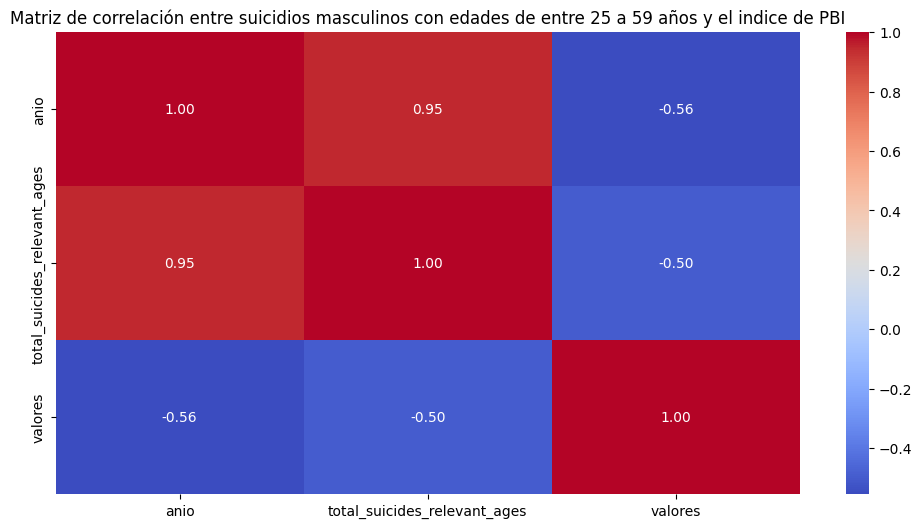

In [110]:
# @title
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_pbi_suicide, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre suicidios masculinos con edades de entre 25 a 59 años y el indice de PBI")
plt.show()

**Visualización #4** _mostrando la matriz de correlaciones con el PBI. Desarrollo propio. Fuente (2)(3)._

\newpage
# Correlación entre el IPC y los suicidios de los sujetos masculinos entre 25 y 59 años
Como forma de buscar una primer comprobación de la existencia de una relación entre la evolución del IPC y el número de suicidios de sujetos masculinos con edades de entre 25 a 59 años la herramienta elegida es la matriz de correlación, entre los suicidios masculinos en el grupo de edad de 25 a 59 años y el PBI basada en los datos del periodo entre el 2004 y el 2024, y mostrando lo siguiente:

1.   **Correlación entre Año y Suicidios**: La correlación entre el año y el total de suicidios en las edades relevantes para el análisis es de 0.95. Esto es una _correlación positiva muy fuerte_, lo que _confirma la tendencia observada anteriormente_: a medida que pasan los años en este período, _el número de suicidios en este grupo demográfico tiende a aumentar significativamente_.
2.   **Correlación entre Año e IPC**: La correlación entre el año y el IPC es de 0.98. Esta es una _correlación positiva extremadamente fuerte_. Indica que a lo largo de los años analizados (2004-2024), el _IPC ha tenido una tendencia muy marcada y constante al aumento_.
3.   **Correlación entre Suicidios e IPC**: La correlación entre el total de suicidios en las edades relevantes para el análisis y el IPC es de 0.95. Esta es una _correlación positiva muy fuerte_. Esto significa que _existe una asociación fuerte y positiva entre el aumento del IPC y el aumento del número de suicidios masculinos en el grupo de 25 a 59 años durante el período 2004-2024_. A medida que el costo de vida ha subido, también lo ha hecho el número de suicidios en esta población.

En resumen, la matriz de correlación para el período 2004-2024 muestra una _fuerte relación positiva entre el IPC y el número de suicidios masculinos en el grupo de 25 a 59 años_. Ambas variables han mostrado una marcada tendencia al aumento a lo largo del tiempo, y sus movimientos están fuertemente asociados en la misma dirección.

Nuevamente, es crucial recordar que la correlación no implica causalidad. Sin embargo, esta fuerte correlación positiva entre el IPC y los suicidios masculinos en la adultez _sugiere una conexión importante que merece una investigación más profunda_ para entender los factores subyacentes que podrían estar influyendo en ambas variables.

In [111]:
# @title
%%capture
# Filter IPC data for the years 2004 to 2024
df_ipc_filtered = df2[(df2[etiqueta_años2] >= 2004) & (df2[etiqueta_años2] <= 2024)].copy()

# Select the relevant IPC columns and rename year column for merging
df_ipc_filtered = df_ipc_filtered[[etiqueta_años2, etiqueta_valores2]].copy()
df_ipc_filtered = df_ipc_filtered.rename(columns={etiqueta_años2: etiqueta_año, etiqueta_valores2: 'valores_ipc'})

# Ensure year column is numeric in both dataframes before merging
df_ipc_filtered[etiqueta_año] = pd.to_numeric(df_ipc_filtered[etiqueta_año], errors='coerce')
df_male_relevant_ages[etiqueta_año] = pd.to_numeric(df_male_relevant_ages[etiqueta_año], errors='coerce')

# Convert 'valores_ipc' to numeric, handling commas as decimal separators
df_ipc_filtered['valores_ipc'] = df_ipc_filtered['valores_ipc'].str.replace(',', '.', regex=False).dropna().astype(float)


# Merge the suicide data (df_male_relevant_ages) with the filtered IPC data
merged_df_ipc_suicide = pd.merge(df_male_relevant_ages, df_ipc_filtered, on=etiqueta_año, how='inner')

# Select the relevant numerical columns for correlation
correlation_cols_ipc_suicide = [etiqueta_año, 'total_suicides_relevant_ages', 'valores_ipc']
correlation_data_ipc_suicide = merged_df_ipc_suicide[correlation_cols_ipc_suicide]

# Calculate the correlation matrix
correlation_matrix_ipc_suicide = correlation_data_ipc_suicide.corr()

# Display the correlation matrix
print("Correlation Matrix between IPC and Male Suicides (Ages 25-29 to 55-59) for 2004-2024:")
display(correlation_matrix_ipc_suicide)

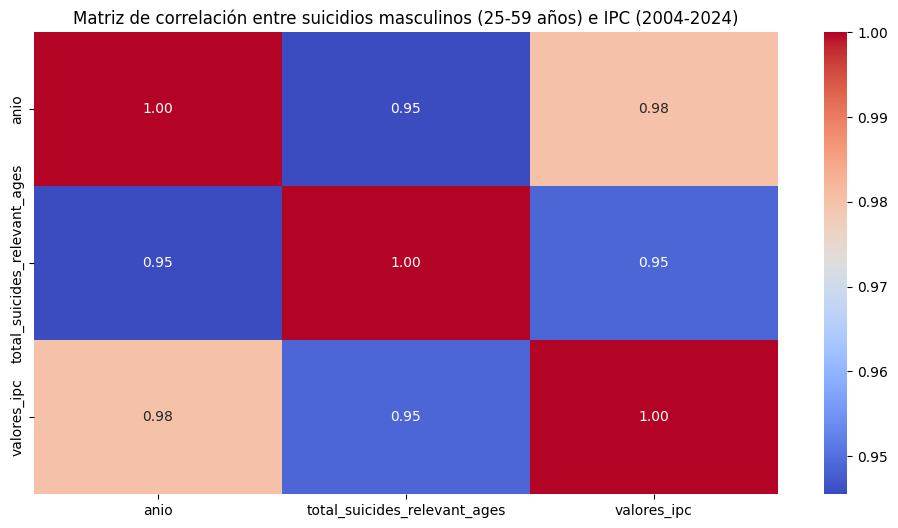

In [112]:
# @title
# Optionally, visualize the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_ipc_suicide, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre suicidios masculinos (25-59 años) e IPC (2004-2024)")
plt.show()

**Visualización #5** _mostrando la matriz de correlaciones con el IPC. Desarrollo propio. Fuente (2)(4)._

\newpage
## Correlación entre el IPC con desface de uno y dos años y los suicidios
Como se pudo ver, el IPC refleja el _costo de vida_ que los Uruguayos deben de gestionar para poder subsistir. Sin embargo, se consideró prudente el pensar en la posibilidad de que los efectos del IPC no incidan en los factores psicosociales económicos de forma inmediata.
Es por esto que se decidió recalcular la matriz de correlación para el IPC con un desfase de uno y dos años.

La nueva matriz de correlación entre el IPC desfazado un año y los suicidios masculinos adultos (25-59 años) para el período 2004-2024 es la siguiente:

La correlación entre el año y el total de suicidios en las edades relevantes para el análisis sigue siendo de 0.95. Esto es consistente con los análisis anteriores y refleja la fuerte tendencia al aumento de los suicidios a lo largo del tiempo en este grupo etario.
La correlación entre el año y el IPC desplazado es de 0.98. Esto es muy similar a la correlación del año con el IPC sin desplazar, lo que indica que la tendencia ascendente del IPC se mantiene fuertemente asociada al paso del tiempo, incluso con el desplazamiento.
La correlación entre el total de suicidios en las edades relevantes al análisis y el IPC desplazado es de 0.96.

Al comparar esta última correlación (0.96) con la correlación sin desplazar (0.95) obtenida anteriormente, se observo que la correlación positiva entre el IPC y los suicidios masculinos adultos aumentaron ligeramente cuando se consideró un desfase de un año en el IPC. Esto podría sugerir que los efectos del aumento del costo de vida (reflejado en el IPC) podrían tener un impacto en el número de suicidios masculinos adultos con un retraso de aproximadamente un año.

Es importante reiterar que, si bien el análisis de correlación con desfase temporal es interesante y sugiere una asociación temporal más fuerte, no establece una relación de causalidad directa.

Al examinar la nueva matriz de correlación con IPC desfazado 2 años:

La correlación entre los suicidios masculinos en el grupo etario de interés y el IPC desplazado dos años es de casi 0.95.

Al comparar los valores con la correlación sin desplazar (0.95), se concluye que la correlación es mayor con el desplazamiento de un año (0.96) y que luego vuelve a ser similar a la correlación sin desplazamiento con un desplazamiento de dos años (0.95). Esto podría reforzar la idea de un posible efecto retardado del IPC en los suicidios, con el impacto más fuerte ocurriendo aproximadamente un año después del cambio en el IPC, concretamente, dentro de los primeros 12 meses siguientes.

A efecto de facilitar la comprensión de este fenomeno se volcó esta correlación a la _Visualización #9_.

Debido a la naturaleza de la variable IPC y a la forma que afecta el diario vivir de las personas, se descartó el realizar análisis de correlación con otros desfases para ver si la correlación sigue aumentando o disminuye.


In [113]:
# @title
%%capture
# Filter IPC data for the years 2004 to 2024
df_ipc_filtered = df2[(df2[etiqueta_años2] >= 2004) & (df2[etiqueta_años2] <= 2024)].copy()

# Select the relevant IPC columns and rename year column for merging
df_ipc_filtered = df_ipc_filtered[[etiqueta_años2, etiqueta_valores2]].copy()
df_ipc_filtered = df_ipc_filtered.rename(columns={etiqueta_años2: etiqueta_año, etiqueta_valores2: 'valores_ipc'})

# Ensure year column is numeric in both dataframes before merging
df_ipc_filtered[etiqueta_año] = pd.to_numeric(df_ipc_filtered[etiqueta_año], errors='coerce')
df_male_relevant_ages[etiqueta_año] = pd.to_numeric(df_male_relevant_ages[etiqueta_año], errors='coerce')

# Convert 'valores_ipc' to numeric, handling commas as decimal separators
df_ipc_filtered['valores_ipc'] = df_ipc_filtered['valores_ipc'].str.replace(',', '.', regex=False).dropna().astype(float)

# Shift the IPC values by one year forward.
# The IPC value for year Y will be in the row for year Y+1 in the shifted column.
df_ipc_filtered['valores_ipc_shifted'] = df_ipc_filtered['valores_ipc'].shift(-1)

# To correlate IPC from year Y with suicides from year Y+1,
# we merge the suicide data with the shifted IPC data on the year.
# The shifted IPC value in a given row corresponds to the previous year's IPC.
# We need to be careful with the merge to align correctly.
# Let's rename the shifted column to avoid confusion and merge on the year.
df_ipc_shifted_for_merge = df_ipc_filtered[[etiqueta_año, 'valores_ipc_shifted']].copy()
# The shifted value in year Y corresponds to IPC from year Y-1.
# We want IPC from year Y-1 to correlate with suicides from year Y.
# So, we can merge the suicide data with the shifted IPC data.

merged_df_ipc_suicide = pd.merge(df_male_relevant_ages, df_ipc_shifted_for_merge, on=etiqueta_año, how='inner')

# Select the relevant numerical columns for correlation, using the shifted IPC values
correlation_cols_ipc_suicide = [etiqueta_año, 'total_suicides_relevant_ages', 'valores_ipc_shifted']
correlation_data_ipc_suicide = merged_df_ipc_suicide[correlation_cols_ipc_suicide]

# Calculate the correlation matrix
# Note: The last row will have a NaN in 'valores_ipc_shifted' due to the shift.
# The correlation calculation will handle this by default (pairwise deletion).
correlation_matrix_ipc_suicide_shifted = correlation_data_ipc_suicide.corr()

# Display the correlation matrix
print("Correlation Matrix between Shifted IPC (1 year lag) and Male Suicides (Ages 25-29 to 55-59) for 2004-2024:")
display(correlation_matrix_ipc_suicide_shifted)

In [114]:
# @title
%%capture
# Filter IPC data for the years 2004 to 2024
df_ipc_filtered = df2[(df2[etiqueta_años2] >= 2004) & (df2[etiqueta_años2] <= 2024)].copy()

# Select the relevant IPC columns and rename year column for merging
df_ipc_filtered = df_ipc_filtered[[etiqueta_años2, etiqueta_valores2]].copy()
df_ipc_filtered = df_ipc_filtered.rename(columns={etiqueta_años2: etiqueta_año, etiqueta_valores2: 'valores_ipc'})

# Ensure year column is numeric in both dataframes before merging
df_ipc_filtered[etiqueta_año] = pd.to_numeric(df_ipc_filtered[etiqueta_año], errors='coerce')
df_male_relevant_ages[etiqueta_año] = pd.to_numeric(df_male_relevant_ages[etiqueta_año], errors='coerce')

# Convert 'valores_ipc' to numeric, handling commas as decimal separators
df_ipc_filtered['valores_ipc'] = df_ipc_filtered['valores_ipc'].str.replace(',', '.', regex=False).dropna().astype(float)

# Shift the IPC values by two year forward.
# The IPC value for year Y will be in the row for year Y+1 in the shifted column.
df_ipc_filtered['valores_ipc_shifted2'] = df_ipc_filtered['valores_ipc'].shift(-2)

# To correlate IPC from year Y with suicides from year Y+2,
# we merge the suicide data with the shifted IPC data on the year.
# The shifted IPC value in a given row corresponds to the previous year's IPC.
# We need to be careful with the merge to align correctly.
# Let's rename the shifted column to avoid confusion and merge on the year.
df_ipc_shifted_for_merge2 = df_ipc_filtered[[etiqueta_año, 'valores_ipc_shifted2']].copy()
# The shifted value in year Y corresponds to IPC from year Y-2.
# We want IPC from year Y-2 to correlate with suicides from year Y.
# So, we can merge the suicide data with the shifted IPC data.

merged_df_ipc_suicide2 = pd.merge(df_male_relevant_ages, df_ipc_shifted_for_merge2, on=etiqueta_año, how='inner')

# Select the relevant numerical columns for correlation, using the shifted IPC values
correlation_cols_ipc_suicide = [etiqueta_año, 'total_suicides_relevant_ages', 'valores_ipc_shifted2']
correlation_data_ipc_suicide2 = merged_df_ipc_suicide2[correlation_cols_ipc_suicide]

# Calculate the correlation matrix
# Note: The last row will have a NaN in 'valores_ipc_shifted' due to the shift.
# The correlation calculation will handle this by default (pairwise deletion).
correlation_matrix_ipc_suicide_shifted2 = correlation_data_ipc_suicide2.corr()

# Display the correlation matrix
print("Correlation Matrix between Shifted IPC (2 year lag) and Male Suicides (Ages 25-29 to 55-59) for 2004-2024:")
display(correlation_matrix_ipc_suicide_shifted2)

In [115]:
# @title
%%capture
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(24, 6)) # 1 row, 2 columns

# Plot the first heatmap on the left subplot
sns.heatmap(correlation_matrix_ipc_suicide_shifted, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Matriz de correlación entre suicidios masculinos (25-59 años) e IPC (2004-2024) desplazado 1 año")

# Plot the second heatmap on the right subplot
sns.heatmap(correlation_matrix_ipc_suicide_shifted2, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Matriz de correlación entre suicidios masculinos (25-59 años) e IPC (2004-2024) desplazado 2 años")

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

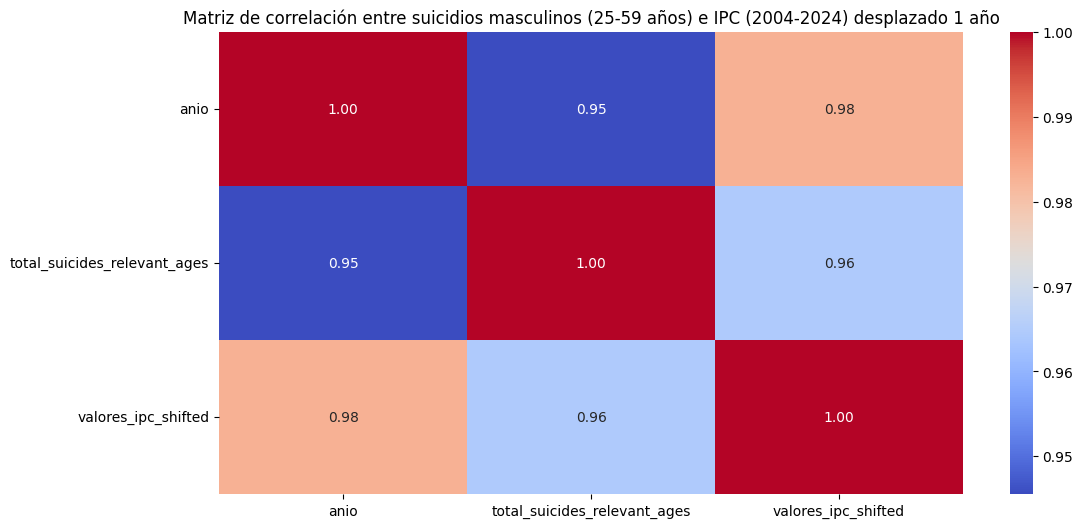

In [116]:
# @title

# Optionally, visualize the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_ipc_suicide_shifted, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre suicidios masculinos (25-59 años) e IPC (2004-2024) desplazado 1 año")
plt.show()

**Visualización #6** _mostrando la matriz de correlaciones con el IPC desplazado 1 año. Desarrollo propio. Fuente (2)(4)._

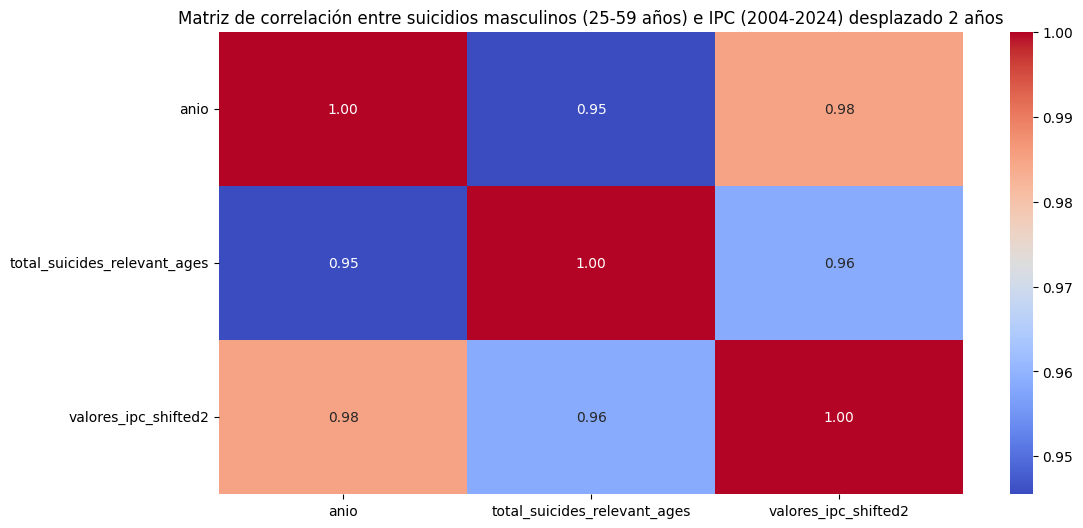

In [117]:
# @title

# Optionally, visualize the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_ipc_suicide_shifted2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre suicidios masculinos (25-59 años) e IPC (2004-2024) desplazado 2 años")
plt.show()

Visualización #7 mostrando la matriz de correlaciones con el IPC desplazado 2 años. Desarrollo propio. Fuente (2)(4).

\newpage
# Visualización de ambas correlaciones.

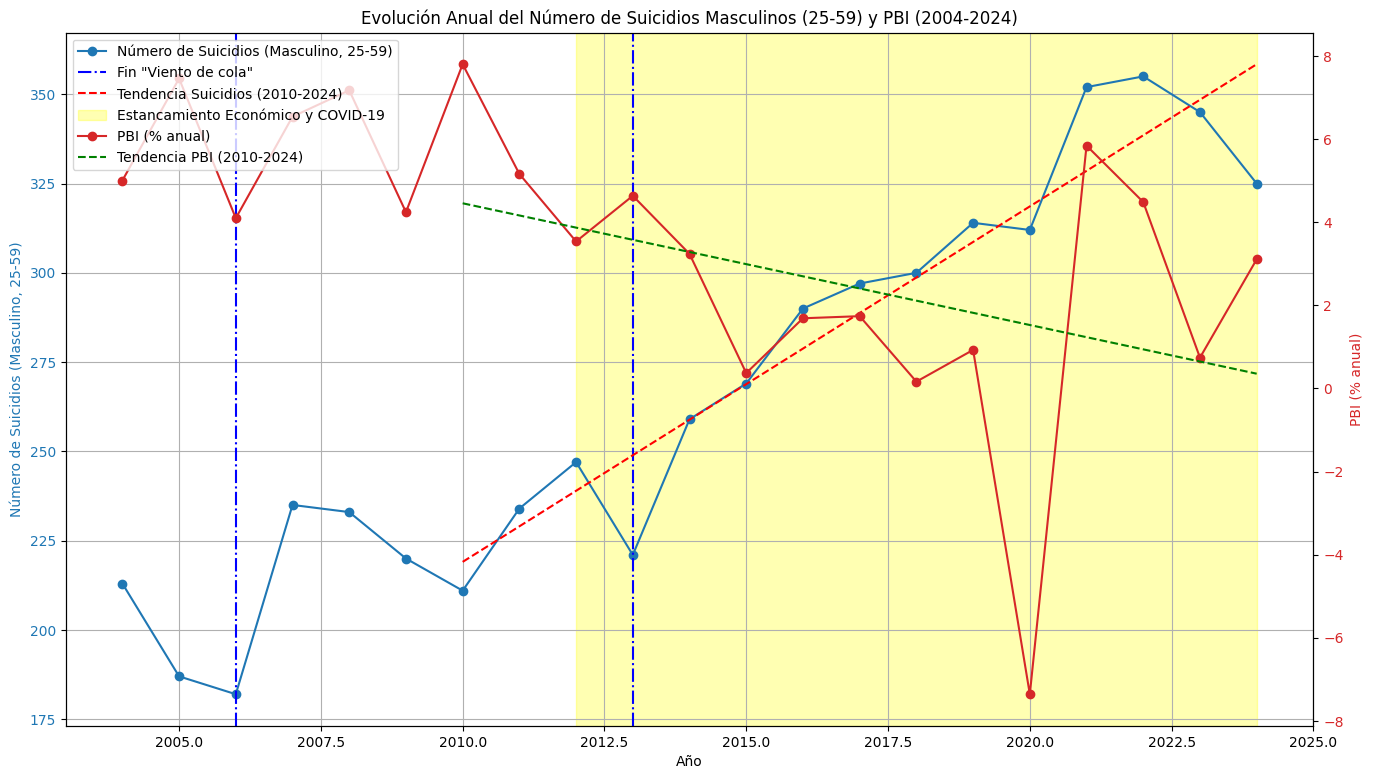

In [118]:
# @title
# Filter for male suicides
df1_male = df1[df1[etiqueta_sexo] == 'Masculino'].copy()

# Define the relevant age group columns
relevant_age_groups = [etiqueta_2529, etiqueta_3034, etiqueta_3539, etiqueta_4044,
                       etiqueta_4549, etiqueta_5054, etiqueta_5559]

# Select only the year and relevant age group columns
df_male_relevant_ages = df1_male[[etiqueta_año] + relevant_age_groups].copy()

# Convert relevant age group columns to numeric, coercing errors
for col in relevant_age_groups:
    df_male_relevant_ages[col] = pd.to_numeric(df_male_relevant_ages[col], errors='coerce')

# Calculate the sum of suicides for the relevant age groups per year
df_male_relevant_ages['total_suicides_relevant_ages'] = df_male_relevant_ages[relevant_age_groups].sum(axis=1)

# Filter PBI data for the years 2004 to 2024
df_pbi_filtered = df_pbi[(df_pbi[etiqueta_año] >= 2004) & (df_pbi[etiqueta_año] <= 2024)].copy()

# Create a figure and a secondary y-axis
fig, ax1 = plt.subplots(figsize=(16.1, 9))

# Plot suicide data on the primary y-axis
ax1.plot(df_male_relevant_ages[etiqueta_año], df_male_relevant_ages['total_suicides_relevant_ages'], marker='o', color='tab:blue', label='Número de Suicidios (Masculino, 25-59)')
ax1.set_xlabel("Año")
ax1.set_ylabel("Número de Suicidios (Masculino, 25-59)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Create a secondary y-axis for PBI data
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("PBI (% anual)", color=color)
ax2.plot(df_pbi_filtered[etiqueta_año], df_pbi_filtered['valores'], marker='o', color=color, label='PBI (% anual)')
ax2.tick_params(axis='y', labelcolor=color)

# Add vertical lines and shaded areas
ax1.axvline(x=2006, color='blue', linestyle='dashdot')
ax1.axvline(x=2013, color='blue', linestyle='dashdot', label='Fin "Viento de cola"')

# Add trend line for suicide data
df_trend = df_male_relevant_ages[(df_male_relevant_ages[etiqueta_año] >= 2010) & (df_male_relevant_ages[etiqueta_año] <= 2024)].copy()
x = df_trend[etiqueta_año]
y = df_trend['total_suicides_relevant_ages']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax1.plot(x, p(x), color='red', linestyle='--', label='Tendencia Suicidios (2010-2024)')

# Add trend line for PBI data
df_trend = df_pbi_filtered[(df_pbi_filtered[etiqueta_año] >= 2010) & (df_pbi_filtered[etiqueta_año] <= 2024)].copy()
x = df_trend[etiqueta_año]
y = df_trend['valores']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax2.plot(x, p(x), color='green', linestyle='--', label='Tendencia PBI (2010-2024)')

# Add shaded area for economic stagnation and COVID-19
ax1.axvspan(2012, 2024, color='yellow', alpha=0.3, label='Estancamiento Económico y COVID-19')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


plt.title("Evolución Anual del Número de Suicidios Masculinos (25-59) y PBI (2004-2024)")
plt.show()

**Visualización #8** _mostrando el desarrollo del PBI y el índice de suicidios de sujetos masculinos de 25 a 59 años. Desarrollo propio. Fuente (2)(3)._

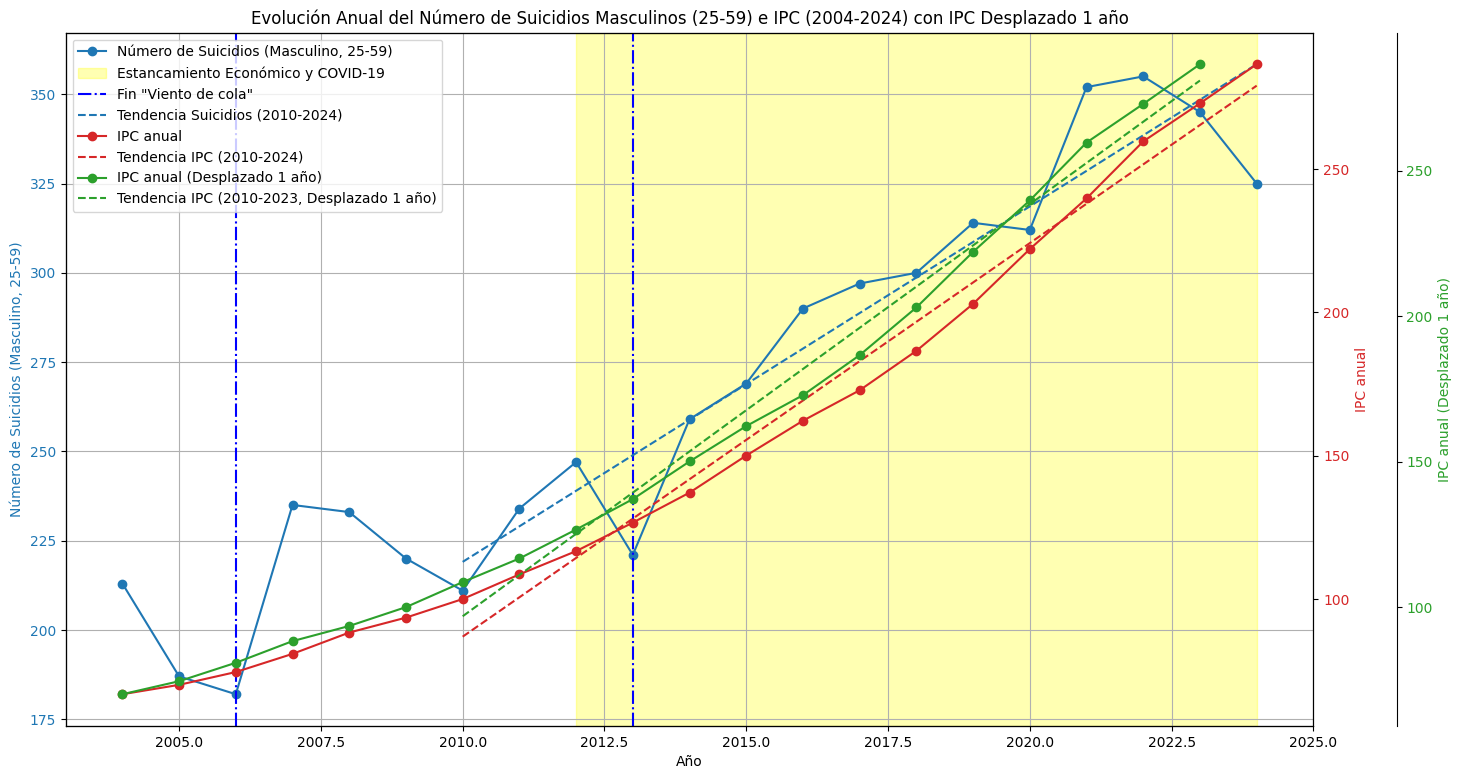

In [119]:
# @title
# Filter for male suicides
df1_male = df1[df1[etiqueta_sexo] == 'Masculino'].copy()

# Define the relevant age group columns
relevant_age_groups = [etiqueta_2529, etiqueta_3034, etiqueta_3539, etiqueta_4044,
                       etiqueta_4549, etiqueta_5054, etiqueta_5559]

# Select only the year and relevant age group columns
df_male_relevant_ages = df1_male[[etiqueta_año] + relevant_age_groups].copy()

# Convert relevant age group columns to numeric, coercing errors
for col in relevant_age_groups:
    df_male_relevant_ages[col] = pd.to_numeric(df_male_relevant_ages[col], errors='coerce')

# Calculate the sum of suicides for the relevant age groups per year
df_male_relevant_ages['total_suicides_relevant_ages'] = df_male_relevant_ages[relevant_age_groups].sum(axis=1)

# Filter IPC data for the years 2004 to 2024 (using the filtered df_ipc_filtered from previous cell)
df_ipc_filtered_plot = df_ipc_filtered[(df_ipc_filtered[etiqueta_año] >= 2004) & (df_ipc_filtered[etiqueta_año] <= 2024)].copy()

# Shift the IPC values by one year forward for visualization
df_ipc_filtered_plot['valores_ipc_shifted1'] = df_ipc_filtered_plot['valores_ipc'].shift(-1)


# Create a figure and secondary y-axes
fig, ax1 = plt.subplots(figsize=(16.1, 9))

# Plot suicide data on the primary y-axis
ax1.plot(df_male_relevant_ages[etiqueta_año], df_male_relevant_ages['total_suicides_relevant_ages'], marker='o', color='tab:blue', label='Número de Suicidios (Masculino, 25-59)')
ax1.set_xlabel("Año")
ax1.set_ylabel("Número de Suicidios (Masculino, 25-59)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Create a secondary y-axis for original IPC data
ax2 = ax1.twinx()
color_ipc_original = 'tab:red'
ax2.set_ylabel("IPC anual", color=color_ipc_original)
ax2.plot(df_ipc_filtered_plot[etiqueta_año], df_ipc_filtered_plot['valores_ipc'], marker='o', color=color_ipc_original, label='IPC anual')
ax2.tick_params(axis='y', labelcolor=color_ipc_original)

# Create a third y-axis for shifted IPC data
ax3 = ax1.twinx()
# Offset the spine of the third axis to the right
ax3.spines['right'].set_position(('outward', 60))
color_ipc_shifted = 'tab:green'
ax3.set_ylabel("IPC anual (Desplazado 1 año)", color=color_ipc_shifted)
ax3.plot(df_ipc_filtered_plot[etiqueta_año], df_ipc_filtered_plot['valores_ipc_shifted1'], marker='o', color=color_ipc_shifted, label='IPC anual (Desplazado 1 año)')
ax3.tick_params(axis='y', labelcolor=color_ipc_shifted)

# Add shaded area for economic stagnation and COVID-19
ax1.axvspan(2012, 2024, color='yellow', alpha=0.3, label='Estancamiento Económico y COVID-19')

# Add vertical lines and shaded areas
ax1.axvline(x=2006, color='blue', linestyle='dashdot')
ax1.axvline(x=2013, color='blue', linestyle='dashdot', label='Fin "Viento de cola"')

# Add trend line for suicide data
df_trend_suicide = df_male_relevant_ages[(df_male_relevant_ages[etiqueta_año] >= 2010) & (df_male_relevant_ages[etiqueta_año] <= 2024)].copy()
x_suicide = df_trend_suicide[etiqueta_año]
y_suicide = df_trend_suicide['total_suicides_relevant_ages']
z_suicide = np.polyfit(x_suicide, y_suicide, 1)
p_suicide = np.poly1d(z_suicide)
ax1.plot(x_suicide, p_suicide(x_suicide), color='tab:blue', linestyle='--', label='Tendencia Suicidios (2010-2024)')

# Add trend line for original IPC data
df_trend_ipc_original = df_ipc_filtered_plot[(df_ipc_filtered_plot[etiqueta_año] >= 2010) & (df_ipc_filtered_plot[etiqueta_año] <= 2024)].copy()
x_ipc_original = df_trend_ipc_original[etiqueta_año]
y_ipc_original = df_trend_ipc_original['valores_ipc']
z_ipc_original = np.polyfit(x_ipc_original, y_ipc_original, 1)
p_ipc_original = np.poly1d(z_ipc_original)
ax2.plot(x_ipc_original, p_ipc_original(x_ipc_original), color=color_ipc_original, linestyle='--', label='Tendencia IPC (2010-2024)')

# Add trend line for shifted IPC data
df_trend_ipc_shifted = df_ipc_filtered_plot[(df_ipc_filtered_plot[etiqueta_año] >= 2010) & (df_ipc_filtered_plot[etiqueta_año] <= 2023)].copy() # Adjust end year for shifted data
x_ipc_shifted = df_trend_ipc_shifted[etiqueta_año]
y_ipc_shifted = df_trend_ipc_shifted['valores_ipc_shifted1']
z_ipc_shifted = np.polyfit(x_ipc_shifted, y_ipc_shifted, 1)
p_ipc_shifted = np.poly1d(z_ipc_shifted)
ax3.plot(x_ipc_shifted, p_ipc_shifted(x_ipc_shifted), color=color_ipc_shifted, linestyle='--', label='Tendencia IPC (2010-2023, Desplazado 1 año)')


# Combine legends from all axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')


plt.title("Evolución Anual del Número de Suicidios Masculinos (25-59) e IPC (2004-2024) con IPC Desplazado 1 año")
plt.show()

**Visualización #9** _mostrando el desarrollo del IPC y el índice de suicidios de sujetos masculinos de 25 a 59 años, e incluyendo el desarrollo del IPC desplazado un año para considerar el tiempo necesario en que el impacto se refleje en la población. Desarrollo propio. Fuente (2)(4)._

\newpage
# Conclusiones basadas en la evidencia:

1.   Tendencia al aumento en suicidios masculinos adultos: Las visualizaciones y las matrices de correlación confirman una clara tendencia al aumento en el número de suicidios masculinos en el grupo de edad de 25 a 59 años a lo largo del período analizado (2004-2024). Este patrón se observa de forma consistente en la distribución por edades a lo largo de los años.
2.   Correlación negativa moderada con el PBI: Se encontró una correlación negativa moderada (-0.50) entre el PBI y el número de suicidios masculinos en la adultez. Esto sugiere que, durante el período estudiado, ha habido una tendencia a que los años con menor crecimiento o disminución del PBI coincidan con un mayor número de suicidios en este grupo demográfico.
3.   Correlación positiva muy fuerte con el IPC: Se observó una correlación positiva muy fuerte (0.95) entre el IPC y el número de suicidios masculinos en la adultez. Esto indica una asociación significativa: a medida que el costo de vida (reflejado por el IPC) ha aumentado, también lo ha hecho el número de suicidios en esta población. Ambas variables muestran tendencias ascendentes muy marcadas a lo largo del tiempo.
4.   Correlación positiva aún más fuerte con el IPC en los primeros 12 meses del incremento de precios: a medida que el costo de vida (reflejado por el IPC) ha aumentado y no revierte su comportamiento en el corto plazo (menor a 12 meses) sino por el contrario muestra un constante incremento, la correlación positiva entre IPC y suicidios se incrementa en un punto (0.96). Ambas variables muestran tendencias ascendentes muy marcadas a lo largo del tiempo.
5.   Coincidencia temporal con períodos económicos: Las visualizaciones que superponen los datos de suicidios con los períodos de "Fin del Viento de cola" y "Estancamiento Económico y COVID-19" sugieren una posible relación temporal entre los cambios en el panorama económico y el incremento de los suicidios masculinos en la adultez. La tendencia ascendente de los suicidios en este grupo parece ser más pronunciada a partir del inicio del período de estancamiento económico.
6.   Los factores económicos como posibles influencias: Si bien la correlación no establece causalidad directa, las fuertes asociaciones observadas entre los suicidios masculinos en la adultez y los indicadores económicos (especialmente el IPC) sugieren que los factores económicos podrían estar ejerciendo una influencia en esta problemática. Los factores psicosociales económicos discutidos (estrés económico, incertidumbre, salud mental) podrían ser mecanismos a través de los cuales estas variables se relacionan.



\newpage
# Recomendaciones para futuras investigaciones:

1.   Análisis de causalidad: Realizar estudios más profundos que permitan explorar posibles relaciones de causalidad entre los factores económicos y el riesgo suicida. Esto podría incluir modelos econométricos más complejos, análisis de series temporales con técnicas avanzadas, o estudios cualitativos para comprender mejor las experiencias individuales.
2.   Inclusión de otros factores psicosociales y de salud mental: Ampliar el análisis para incorporar datos sobre otros factores psicosociales (como desempleo a nivel individual, endeudamiento, acceso a redes de apoyo social) y de salud mental (tasas de depresión, ansiedad, acceso a servicios de salud mental) para construir un modelo más completo de los factores que contribuyen al suicidio.
3.   Análisis desagregado: Si fuera posible acceder a datos más desagregados (por ejemplo, a nivel departamental o socioeconómico), realizar análisis que permitan identificar si la relación entre los factores económicos y los suicidios varía en diferentes subpoblaciones o regiones.
4.   Considerar el impacto de políticas económicas y sociales: Investigar cómo las políticas económicas y sociales implementadas durante los períodos analizados pudieron haber influido tanto en los indicadores económicos como en las tasas de suicidio.
5.   Análisis longitudinal a nivel individual: Idealmente, realizar estudios longitudinales a nivel individual que sigan a personas a lo largo del tiempo para ver cómo los cambios en su situación económica personal se relacionan con su bienestar psicológico y riesgo suicida.



\newpage

En conclusión, este análisis exploratorio proporciona una evidencia inicial robusta de una asociación entre los factores económicos (particularmente el IPC) y el aumento de los suicidios masculinos en la adultez en Uruguay durante el período 2004-2024. Los hallazgos justifican plenamente la realización de investigaciones más detalladas para comprender mejor esta compleja relación y guiar el desarrollo de políticas públicas efectivas para la prevención del suicidio.

\newpage
# Referencias:

1.   Presentación del Día Nacional de Prevención del Suicidio ([PDF](https://www.gub.uy/ministerio-salud-publica/sites/ministerio-salud-publica/files/documentos/noticias/PRENSA%20-%20Presentacio%CC%81n%20dia%20nacional%2017-7-25.pdf))
2.   Estadísticas Vitales (Defunciones) - Ministerio de Salud Pública del Uruguay ([RAR - XLSX, CSV, PDF](https://uins.msp.gub.uy/#def))
3.   Producto Bruto Interno - Cámara de Comercio y Servicios del Uruguay - Monitor Económico - [online/CSV](https://www.cncs.com.uy/monitor-economico/producto-bruto-interno-pbi/)
4.   Producto Bruto Interno - Cámara de Comercio y Servicios del Uruguay - Monitor Económico - [online/CSV](https://www.cncs.com.uy/monitor-economico/indice-de-precios-al-consumo/)
5.   UNFPA Uruguay. (2020). Masculinidades y nuevas dinámicas familiares en el contexto de la COVID-19. [https://uruguay.unfpa.org/sites/default/files/pub-pdf/MASCULINIDADES.pdf](https://uruguay.unfpa.org/sites/default/files/pub-pdf/MASCULINIDADES.pdf)
6.   González Mora, F. & Macari, A. (2017). ¿Qué roles asumen los/as jóvenes en sus hogares? Arreglos familiares en el Uruguay del siglo XXI. En Facultad de Ciencias Sociales - Universidad de la República, Facultad de Psicología - Universidad de la República, Universidad de la República - Uruguay, Mujer y Salud en Uruguay (MYSU), Espacio Salud, Fondo de Población de las Naciones Unidas, & Organización de Naciones Unidas (Eds.), Estudios sobre Masculinidades: Nuevas perspectivas de investigación en Uruguay (pp. 79-89). Facultad de Psicología, UdelaR. [https://psico.edu.uy/sites/default/files/2017-07/Estudios-sobre-Masculinidades.pdf](https://psico.edu.uy/sites/default/files/2017-07/Estudios-sobre-Masculinidades.pdf)
7.   Sistema de Información de Género. (2014). El mandato del proveedor económico del hogar. En Ministerio de Desarrollo Social, Cuadernos del Sistema de Información de Género N° 6: Construcciones de la masculinidad hegemónica: Una aproximación a su expresión en cifras (pp. 17-30). MIDES. [https://archivo.mides.gub.uy/innovaportal/file/15091/1/cuadernos-seis.pdf](https://archivo.mides.gub.uy/innovaportal/file/15091/1/cuadernos-seis.pdf)
8.   Instituto Nacional de Estadística (INE). (2008). Series históricas: Índice Medio de Salarios (IMS) base julio 2008=100. GUB.UY. https://www.gub.uy/instituto-nacional-estadistica/datos-y-estadisticas/estadisticas/series-historicas-indice-medio-salarios-ims-base-julio-2008100   


In [120]:
# @title
%%capture
fig, ax1 = plt.subplots(figsize=(16.5,6))

color = "tab:red"
ax1.set_xlabel("Año")
ax1.set_ylabel("PBI (% anual)", color=color)
ax1.plot(años, valores, color=color, marker="o")
ax1.tick_params(axis="y", labelcolor=color)

# Add a horizontal line at y=0
ax1.axhline(0, color='gray', linestyle='solid')

# ax1.axvline(x=2002, color='blue', linestyle='dashdot')
# ax1.axvline(x=2020, color='blue', linestyle='dashdot')

ax1.axvspan(1991, 2003, color='pink', alpha=0.3, label='Crisis 2002')
ax1.axvspan(2012, 2024, color='yellow', alpha=0.3, label='Estancamiento Económico')
ax1.axvspan(2020, 2022, color='gray', alpha=0.3, label='COVID-19')

legend = ax1.legend()
for text in legend.get_texts():
    text.set_color("black")

fig.suptitle("Evolución historica: PBI (1961-2024, datos del Banco Mundial)")

plt.show()

In [121]:
# @title
%%capture
# Create a figure with a 1x2 grid of subplots
# The 'figsize' argument controls the overall size of the figure
# The 'sharey=True' argument ensures that both subplots share the same y-axis
fig, axes = plt.subplots(1, 2, figsize=(13.75, 5), sharey=True)

# 'axes' is a NumPy array containing the individual subplot axes objects
# axes[0] refers to the first subplot (left)
# axes[1] refers to the second subplot (right)

# Plot the first PBI graph on the left subplot (axes[0])
# Filter data for years greater than 2011
años_filtered_1 = [año for año in años if año > 2011]
valores_filtered_1 = [valores[i] for i in range(len(años)) if años[i] > 2011]

color = "tab:red"
axes[0].set_xlabel("Año")
axes[0].set_ylabel("PBI (% anual)", color=color)
axes[0].plot(años_filtered_1, valores_filtered_1, color=color, marker="o")
axes[0].tick_params(axis="y", labelcolor=color)
axes[0].axhline(0, color='gray', linestyle='--')
axes[0].axvline(x=2020, color='blue', linestyle='dashdot')
axes[0].set_title("Evolución historica: PBI (2012-2024, datos del Banco Mundial)")


# Plot the second PBI graph on the right subplot (axes[1])
# Filter data for years between 1998 and 2010
años_filtered_2 = [año for año in años if año > 1997 and año < 2011]
valores_filtered_2 = [valores[i] for i in range(len(años)) if años[i] > 1997 and años[i] < 2011]

color = "tab:red"
axes[1].set_xlabel("Año")
# axes[1].set_ylabel("PBI (% anual)", color=color) # Sharey is True, so no need for this on the second subplot
axes[1].plot(años_filtered_2, valores_filtered_2, color=color, marker="o")
axes[1].tick_params(axis="y", labelcolor=color)
axes[1].axhline(0, color='gray', linestyle='--')
axes[1].axvline(x=2002, color='blue', linestyle='dashdot')
axes[1].set_title("Evolución historica: PBI (1998-2010, datos del Banco Mundial)")


# Add a title to the entire figure
fig.suptitle('Evolución historica: PBI (Comparativa de períodos)', y=1.02) # Adjust y to place title above subplots

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout() # rect is not needed if suptitle y is adjusted

# Show the plot
plt.show()

In [122]:
# @title
%%capture
fig, ax4 = plt.subplots(figsize=(16.5,6))

color = "tab:red"
ax4.set_xlabel("Año")
ax4.set_ylabel("IPC anual", color=color)
ax4.plot(año, valores_ipc, color=color, marker="o")
ax4.tick_params(axis="y", labelcolor=color)

# Add a horizontal line at y=0
ax4.axhline(0, color='gray', linestyle='solid')

# ax1.axvline(x=2002, color='blue', linestyle='dashdot')
# ax1.axvline(x=2020, color='blue', linestyle='dashdot')

ax4.axvspan(1991, 2003, color='pink', alpha=0.3, label='Crisis 2002')
ax4.axvspan(2012, 2024, color='yellow', alpha=0.3, label='Estancamiento Económico')
ax4.axvspan(2020, 2022, color='gray', alpha=0.3, label='COVID-19')

legend = ax4.legend()
for text in legend.get_texts():
    text.set_color("black")

fig.suptitle("Evolución historica: IPC (Indice de Precios al Consumo, 1990-2024, datos del Banco Mundial)")

plt.show()

In [127]:
%%capture
## CONVIERTE NOTEBOOK A DOCUMENTO HTML .-
#!jupyter nbconvert --to html --no-input '/content/drive/MyDrive/Análisis de la Relación entre Suicidio Masculino Adulto y Factores Económicos en Uruguay/Análisis de la Relación entre Suicidio Masculino Adulto y Factores Económicos en Uruguay.ipynb'
#!pip install nbconvert
#!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

!jupyter nbconvert --to pdf --no-input '/content/drive/MyDrive/Análisis de la Relación entre Suicidio Masculino Adulto y Factores Económicos en Uruguay/Suicidio Masculino Adulto y Factores Económicos en Uruguay del 2004 al 2024.ipynb'